<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/Dusty-Stellar-Sources-Classification/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data from GitHub


The project is hosted on GitHub. Get a copy by running:

In [127]:
!git clone https://github.com/Mahdi-Abdollahii/Dusty-Stellar-Sources-Classification.git

fatal: destination path 'Dusty-Stellar-Sources-Classification' already exists and is not an empty directory.


In [ ]:
!pip install pyunpack

In [ ]:
!pip install patool

# Libraries

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io, requests, zipfile
from zipfile import ZipFile
import seaborn as sns
from sklearn.metrics import confusion_matrix , accuracy_score , recall_score , precision_score , f1_score , classification_report
from pyunpack import Archive
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Function

In [129]:
def savefile(df,name):
  t = df
  t.to_csv(name, header=True, index=True)
  return 0

In [130]:
#metrics
def Model_info( Y , Y_pre ):  
  print(confusion_matrix( Y_test, Y_pre))
  print("accuracy_score = " + str(accuracy_score( Y_test , Y_pre )))
  print('Weighted f1_score =' + str(f1_score( Y_test , Y_pre , average = "weighted")))
  

In [131]:
#https://blog.finxter.com/how-to-plot-sklearn-confusion-matrix-with-labels/
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True,
                          size = [16,12],
                          file_name = False ):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    if cmap is None:
        cmap = plt.get_cmap('Greens')

    plt.figure(figsize=(size[0],size[1]))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title ,fontsize = 16 )
    plt.ylabel('True label' , fontsize = 16 )
    plt.xlabel('Predicted label', fontsize = 16 )
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)




    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            #if cm[i,j]>= 0.01 : # if you want remove 0.1>
                plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                        horizontalalignment="center",
                        color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    if file_name != False : 
        plt.savefig(file_name , dpi=300)
    plt.show()

# Data Preprocessing


## **SMC**

In [132]:
from astropy.io import fits

a = fits.open('/content/Dusty-Stellar-Sources-Classification/Data/J_MNRAS_451_3504_table2.dat.fits')
a[1].columns['---'].name = 'new_name1'
a[1].columns['---'].name = 'new_name2'
a[1].columns['---'].name = 'new_name3'
a[1].columns['---'].name = 'new_name4'
a[1].columns['---'].name = 'new_name5'
a[1].columns['---'].name = 'new_name6'

smc = pd.DataFrame(a[1].data)
smc['Class'].value_counts()

C-AGB                    39
STAR: dusty OB star      23
YSO-3                    22
RSG                      22
C-PN                     20
YSO-1                    14
O-AGB                    11
WR                       10
YSO-4                    10
O-EAGB                    8
YSO-2                     5
O-PN                      4
STAR                      4
RCrB                      3
C-PAGB                    3
HII                       3
OTHER: B[e] star          2
OTHER: FG O-EAGB          2
OTHER: S Star             1
O-PAGB                    1
OTHER: symbiotic star     1
BSG                       1
Name: Class, dtype: int64

In [133]:
smc = smc[['RAdeg','DEdeg','UMmag','BMmag','VMmag','IMmag','<Vmag>','<Imag>','Iamp','P2','J2mag',
         'H2mag','Ks2mag','JImag','HImag','KImag','IRAC1','IRAC2','IRAC3','IRAC4',
         '[24]','[70]','[160]','Tmcd','Class']]

smc = smc.rename(columns={'UMmag':'Umag','BMmag':'Bmag','VMmag':'Vmag','IMmag':'Imag','Iamp':'IAmp',
                           'P2':'Per','JImag':'Jmag','HImag':'Hmag','KImag':'Ksmag','IRAC1':'[3.6]',
                           'IRAC2':'[4.5]','IRAC3':'[5.8]','IRAC4':'[8.0]','Tmcd':'TeffMcD' , 'Class': 'SpClass'})

In [134]:
for i in smc.index:
  x = smc.loc[i , 'SpClass']
  l = list(x.replace(' ','*'))
  smc.loc[i , 'SpClass'] = ''.join([s for s in l if s != '*'])

In [135]:
smc['SpClass'] = smc['SpClass'].replace({'YSO-1':'YSO','O-EAGB':'OAGB',
                                 'YSO-2':'YSO','O-AGB':'OAGB',
                                 'YSO-3':'YSO','RSG':'RSG',
                                 'YSO-4':'YSO','C-AGB':'CAGB',
                                 'O-PAGB':'PAGB','C-PAGB':'PAGB'})

In [136]:
list_Class_DSS = ['YSO' , 'PAGB' , 'OAGB' , 'RSG' , 'CAGB']
smc['GeneralClass'] = np.nan
for i in smc.index:
  if smc.loc[i,'SpClass'] in list_Class_DSS :
    smc.loc[i,'GeneralClass'] = 'DSS'
  else :
    smc.loc[i,'GeneralClass'] = 'Other'

In [137]:
smc.replace([np.inf, -np.inf, -99, 99.999 , 0.00 ], np.nan, inplace=True)

In [138]:
F_list = smc.columns.drop(['TeffMcD','Per','IAmp'])
SMC_DM = 18.96  # https://arxiv.org/abs/1502.06995
for i in F_list[2:-2] :
  smc[i] = smc[i] - SMC_DM

In [139]:
smc

,RAdeg,DEdeg,Umag,Bmag,Vmag,Imag,<Vmag>,<Imag>,IAmp,Per,...,[3.6],[4.5],[5.8],[8.0],[24],[70],[160],TeffMcD,SpClass,GeneralClass
0,14.737258,-72.165012,-1.672,-1.095,-1.483,-1.025,NaN,NaN,NaN,NaN,...,-6.289,-7.547,-8.861,-10.098,-14.534,NaN,-23.648,NaN,YSO,DSS
1,14.772992,-72.176654,-4.925,-3.913,-3.322,-4.047,-1.359,-3.719,0.02,23.0,...,-8.859,-9.538,-10.246,-11.726,-17.599,-20.672,NaN,NaN,YSO,DSS
2,14.774849,-72.190814,-4.126,-3.003,-3.354,-3.720,NaN,NaN,NaN,NaN,...,-8.415,-9.199,-10.033,-10.980,-12.909,NaN,NaN,NaN,YSO,DSS
3,14.788491,-72.182480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-8.897,-10.099,-11.136,-12.149,-16.759,-20.459,NaN,NaN,YSO,DSS
4,14.801191,-72.166181,-3.719,-2.324,-3.003,-3.536,NaN,NaN,NaN,NaN,...,-6.986,-7.582,-8.538,-10.139,-15.583,-20.251,NaN,NaN,YSO,DSS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,14.488457,-72.654396,-1.433,-0.683,-1.165,-1.937,NaN,NaN,NaN,NaN,...,-6.686,-7.273,-8.261,-9.226,-15.289,-20.521,NaN,NaN,YSO,DSS
205,14.027887,-72.789808,-1.445,-1.084,-1.477,-2.014,NaN,NaN,NaN,NaN,...,-5.481,-5.975,-7.743,-9.168,-15.340,-19.318,-21.974,NaN,YSO,DSS
206,16.039817,-72.837738,-2.197,-3.746,-5.564,NaN,NaN,NaN,NaN,NaN,...,-9.699,-9.711,-9.922,-10.050,-10.804,NaN,NaN,3150.0,OAGB,DSS
207,11.378159,-73.082106,-3.391,-2.611,-2.893,-2.998,NaN,NaN,NaN,NaN,...,NaN,-5.366,-7.286,-8.732,-14.765,-20.172,NaN,NaN,HII,Other


(array([135.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  74.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

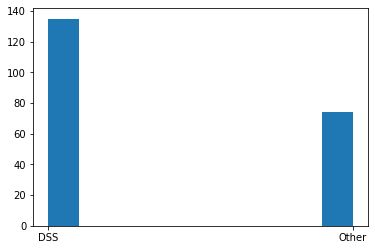

In [140]:
plt.hist(smc['GeneralClass'])

(array([51.,  0., 19.,  0.,  0., 39.,  0., 22.,  0.,  4.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

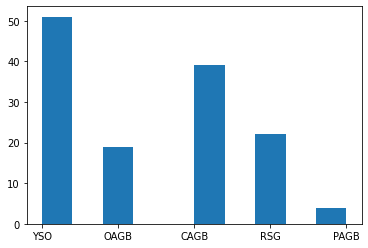

In [141]:
plt.hist(smc[smc['GeneralClass'] == 'DSS']['SpClass'])

----
## **LMC**

In [142]:
from astropy.io import fits
import pandas as pd
with fits.open('/content/Dusty-Stellar-Sources-Classification/Data/J_MNRAS_470_3250_table2.dat.fits') as data:
    lmc = pd.DataFrame(data[1].data)

lmc['SpClass'].value_counts()

     HII    155
    CAGB    152
    OAGB     89
    YSO3     81
     RSG     72
    YSO1     56
HII/YSO3     37
    STAR     31
     OPN     28
    YSO4     23
   CPAGB     19
    YSO2     16
     LBV     15
   OPAGB     14
     CPN     14
      WR     11
   RVTau     10
    B[e]      9
     GAL      8
     SNR      7
    RCrB      6
     UNK      5
     BSG      2
    Nova      1
     YSG      1
Name: SpClass, dtype: int64

In [143]:
lmc = lmc[['RAdeg','DEdeg','Umag','Bmag','Vmag','Imag','<Vmag>','<Imag>','IAmp','Per','J2mag',
         'H2mag','Ks2mag','Jmag','Hmag','Ksmag','[3.6]','[4.5]','[5.8]','[8.0]',
         '[24]','[70]','[160]','TeffMcD','SpClass']]

In [144]:
for i in lmc.index:
  x = lmc.loc[i , 'SpClass']
  l = list(x.replace(' ','*'))
  lmc.loc[i , 'SpClass'] = ''.join([s for s in l if s != '*'])

In [145]:
lmc

,RAdeg,DEdeg,Umag,Bmag,Vmag,Imag,<Vmag>,<Imag>,IAmp,Per,...,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],[70],[160],TeffMcD,SpClass
0,69.3381,-70.5790,-99.000,18.307,16.468,13.943,16.623,13.985,0.057,100.76,...,-99.00,10.9099,10.8052,10.6874,10.5041,9.6408,-99.000,-99.000,3156.0,OAGB
1,69.3653,-67.9097,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.00,...,-99.00,14.0148,13.5151,13.0565,10.1457,7.0279,1.476,-99.000,-99.0,GAL
2,71.6131,-68.7963,20.152,20.746,19.051,16.383,19.386,16.401,1.573,388.70,...,10.68,9.8544,9.1327,8.7100,8.2771,7.3256,-99.000,-99.000,-99.0,CAGB
3,71.8277,-69.7057,17.793,15.644,13.716,11.300,-99.000,-99.000,-99.000,-99.00,...,-99.00,8.8660,9.0441,8.8655,8.7573,7.5515,-99.000,-99.000,3270.0,RSG
4,72.1573,-69.3936,-99.000,21.970,20.987,19.656,-99.000,-99.000,-99.000,-99.00,...,13.21,10.3666,9.4821,8.6769,7.8657,4.8646,-99.000,-99.000,-99.0,YSO2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,92.6059,-67.9392,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.00,...,-99.00,-99.0000,-99.0000,-99.0000,-99.0000,5.8112,-99.000,-99.000,-99.0,OPN
858,74.1082,-66.5322,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.00,...,-99.00,-99.0000,-99.0000,-99.0000,-99.0000,4.0541,-99.000,-5.032,-99.0,HII
859,81.1610,-70.3992,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.00,...,13.80,9.4577,8.3001,7.2930,6.4067,4.6280,-99.000,-99.000,-99.0,CAGB
860,83.2786,-70.5095,-99.000,19.339,18.744,-99.000,-99.000,-99.000,-99.000,-99.00,...,14.08,9.9564,8.5741,7.4169,6.3789,4.4096,-99.000,-99.000,-99.0,CAGB


In [146]:
lmc['SpClass'] = lmc['SpClass'].replace({'OAGB': 'OAGB','CAGB': 'CAGB','YSO1':'YSO',
                                     'YSO2':'YSO','YSO3':'YSO','CPAGB':'PAGB',
                                     'OPAGB':'PAGB','HII/YSO3':'YSO','YSO4':'YSO',
                                     'RSG':'RSG'})

In [147]:
list_Class_DSS = ['YSO' , 'PAGB' , 'OAGB' , 'RSG' , 'CAGB']
lmc['GeneralClass'] = np.nan
for i in lmc.index:
  if lmc.loc[i,'SpClass'] in list_Class_DSS :
    lmc.loc[i,'GeneralClass'] = 'DSS'
  else :
    lmc.loc[i,'GeneralClass'] = 'Other'

In [148]:
lmc.replace([np.inf, -np.inf, -99, 99.999 , 0.00 ], np.nan, inplace=True)

In [149]:
F_list = lmc.columns.drop(['TeffMcD','Per','IAmp'])
LMC_DM = 18.52 # https://arxiv.org/abs/astro-ph/0011056
for i in F_list[2:-2] :
  lmc[i] = lmc[i] - LMC_DM

In [150]:
lmc

,RAdeg,DEdeg,Umag,Bmag,Vmag,Imag,<Vmag>,<Imag>,IAmp,Per,...,[3.6],[4.5],[5.8],[8.0],[24],[70],[160],TeffMcD,SpClass,GeneralClass
0,69.3381,-70.5790,NaN,-0.213,-2.052,-4.577,-1.897,-4.535,0.057,100.76,...,-7.6101,-7.7148,-7.8326,-8.0159,-8.8792,NaN,NaN,3156.0,OAGB,DSS
1,69.3653,-67.9097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.5052,-5.0049,-5.4635,-8.3743,-11.4921,-17.044,NaN,NaN,GAL,Other
2,71.6131,-68.7963,1.632,2.226,0.531,-2.137,0.866,-2.119,1.573,388.70,...,-8.6656,-9.3873,-9.8100,-10.2429,-11.1944,NaN,NaN,NaN,CAGB,DSS
3,71.8277,-69.7057,-0.727,-2.876,-4.804,-7.220,NaN,NaN,NaN,NaN,...,-9.6540,-9.4759,-9.6545,-9.7627,-10.9685,NaN,NaN,3270.0,RSG,DSS
4,72.1573,-69.3936,NaN,3.450,2.467,1.136,NaN,NaN,NaN,NaN,...,-8.1534,-9.0379,-9.8431,-10.6543,-13.6554,NaN,NaN,NaN,YSO,DSS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,92.6059,-67.9392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-12.7088,NaN,NaN,NaN,OPN,Other
858,74.1082,-66.5322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-14.4659,NaN,-23.552,NaN,HII,Other
859,81.1610,-70.3992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-9.0623,-10.2199,-11.2270,-12.1133,-13.8920,NaN,NaN,NaN,CAGB,DSS
860,83.2786,-70.5095,NaN,0.819,0.224,NaN,NaN,NaN,NaN,NaN,...,-8.5636,-9.9459,-11.1031,-12.1411,-14.1104,NaN,NaN,NaN,CAGB,DSS


(array([559.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 303.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

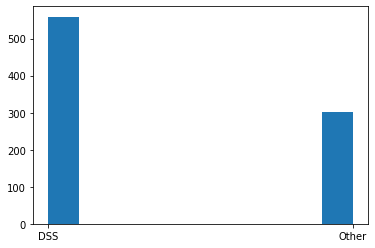

In [151]:
plt.hist(lmc['GeneralClass'])

(array([ 89.,   0., 152.,   0.,   0.,  72.,   0., 213.,   0.,  33.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

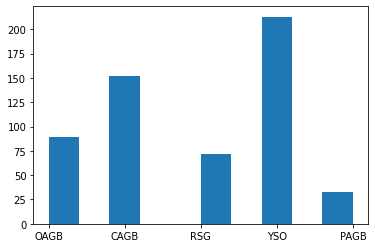

In [152]:
plt.hist(lmc[lmc['GeneralClass'] == 'DSS']['SpClass'])

# Data Cleaning -> Removing Some columns and rows which have many Nan values.

In [ ]:
lmc_DSS = lmc[lmc['GeneralClass']=='DSS'].iloc[:,2:-1]
smc_DSS = smc[smc['GeneralClass']=='DSS'].iloc[:,2:-1]
df = pd.concat([lmc_DSS,smc_DSS])
df = df.reset_index(drop=True)

In [ ]:
df

In [ ]:
print( f"The number of records are : {df.shape[0]} ")
print( f"The number of columns are : {df.shape[1]} ")

In [ ]:
df.dtypes

In [ ]:
nan_data_point = df.isnull().sum().sum()
all_data_point = df.shape[0]*df.shape[1]
missing_fraction = nan_data_point / all_data_point

print(f'There are {all_data_point} data points in this data')
print(f'There are {nan_data_point} missing data in this data')
print(f'The fraction of missing data in all data is {missing_fraction}')

So it is shocking that we have 6179 misisng data in this data.
we should find some ways to adapt it.

The first suggestion is finding and removing some columns which have incredible nan data

In [ ]:
#Checking for total null values
df.isnull().sum()

We find out 7 columns have more than 500 nan value. So we delet this columns and continue with others.

In [ ]:
more_than_500_nan = []
for i in df.columns[:-1]:
  if np.count_nonzero(np.isnan(np.array(df[i]))) > 500 :
    more_than_500_nan.append(i)

print(more_than_500_nan)

In [ ]:
df.drop(more_than_500_nan, inplace=True, axis=1)

Now we calculate previous information again

In [ ]:
nan_data_point = df.isnull().sum().sum()
all_data_point = df.shape[0]*df.shape[1]
missing_fraction = nan_data_point / all_data_point

print(f'There are {all_data_point} data points in this data')
print(f'There are {nan_data_point} missing data in this data')
print(f'The fraction of missing data in all data is {missing_fraction}')

In the next step we should find the number of missing values in for each stars.

In [ ]:
list_row_nan = []
list_Class = []
list_row_nan_6 = []
list_Class_6 = []
list_index_6 = []
for i in range(0,len(df)):
  count_nan = df.iloc[i].isnull().sum()
  list_row_nan.append(count_nan)
  if count_nan > 6 :    
    list_row_nan_6.append(count_nan)
    list_Class_6.append(df.iloc[i][-1])
    list_index_6.append(i)

In [ ]:
plt.hist(list_row_nan_6)

In [ ]:
sum(list_row_nan_6)

In [ ]:
len(list_row_nan_6)

In [ ]:
plt.hist([list_Class_6,df['SpClass']])

In [ ]:
df.drop(list_index_6, axis=0, inplace=True)
df = df.reset_index(drop=True)

In [ ]:
nan_data_point = df.isnull().sum().sum()
all_data_point = df.shape[0]*df.shape[1]
missing_fraction = nan_data_point / all_data_point

print(f'There are {all_data_point} data points in this data')
print(f'There are {nan_data_point} missing data in this data')
print(f'The fraction of missing data in all data is {missing_fraction}')

In [ ]:
plt.hist(df['SpClass'])

In [ ]:
star_number = 70
plt.plot(np.array(df.iloc[star_number][:-1]))
print(df.iloc[star_number][-1])

In [ ]:
col = df.columns
g = sns.pairplot(df.loc[:,col],hue="SpClass")
g.fig.set_size_inches(20,16)

In [ ]:
col = df.columns
g = sns.pairplot(df.loc[:,col],hue="SpClass", kind='kde')
g.fig.set_size_inches(20,16)

In [ ]:
sns.boxplot(data=df.loc[:,col[0:-1]])
plt.show()

In [ ]:
plt.figure(figsize=(15,12)) #manage the size of the plot
sns.heatmap(df.loc[:,col].corr(),annot=True , cmap= "Greens" ) #df.corr() makes a correlation matrix and sns.heatmap is used to show the correlations heatmap
plt.show()

# Data Cleaning -> Previous data cleaning + Rmoving some columns which hove correlation with others

In [ ]:
lmc_DSS = lmc[lmc['GeneralClass']=='DSS']
smc_DSS = smc[smc['GeneralClass']=='DSS']
df = pd.concat([lmc_DSS,smc_DSS])
df = df.reset_index(drop=True)

In [ ]:
df

In [ ]:
print( f"The number of records are : {df.shape[0]} ")
print( f"The number of columns are : {df.shape[1]} ")

In [ ]:
df.dtypes

In [ ]:
nan_data_point = df.iloc[:,2:-1].isnull().sum().sum()
all_data_point = df.iloc[:,2:-1].shape[0]*df.iloc[:,2:-1].shape[1]
missing_fraction = nan_data_point / all_data_point

print(f'There are {all_data_point} data points in this data')
print(f'There are {nan_data_point} missing data in this data')
print(f'The fraction of missing data in all data is {missing_fraction}')

So it is shocking that we have 6179 misisng data in this data.
we should find some ways to adapt it.

The first suggestion is finding and removing some columns which have incredible nan data

In [ ]:
#Checking for total null values
df.isnull().sum()

We find out 7 columns have more than 500 nan value. So we delet this columns and continue with others.

In [ ]:
more_than_500_nan = []
for i in df.iloc[:,2:-1].columns[:-1]:
  if np.count_nonzero(np.isnan(np.array(df.iloc[:,2:-1][i]))) > 500 :
    more_than_500_nan.append(i)

print(more_than_500_nan)

In [ ]:
df.drop(more_than_500_nan, inplace=True, axis=1)

In [ ]:
df.drop(['J2mag','H2mag','Ks2mag'], inplace=True, axis=1)

In [ ]:
df

Now we calculate previous information again

In [ ]:
nan_data_point = df.iloc[:,2:-1].isnull().sum().sum()
all_data_point = df.iloc[:,2:-1].shape[0]*df.iloc[:,2:-1].shape[1]
missing_fraction = nan_data_point / all_data_point

print(f'There are {all_data_point} data points in this data')
print(f'There are {nan_data_point} missing data in this data')
print(f'The fraction of missing data in all data is {missing_fraction}')

In the next step we should find the number of missing values in for each stars.

In [ ]:
list_row_nan = []
list_Class = []
list_row_nan_6 = []
list_Class_6 = []
list_index_6 = []
for i in range(0,len(df.iloc[:,2:-1])):
  count_nan = df.iloc[:,2:-1].iloc[i].isnull().sum()
  list_row_nan.append(count_nan)
  if count_nan > 6 :    
    list_row_nan_6.append(count_nan)
    list_Class_6.append(df.iloc[:,2:-1].iloc[i][-1])
    list_index_6.append(i)

In [ ]:
plt.hist(list_row_nan_6)

In [ ]:
sum(list_row_nan_6)

In [ ]:
len(list_row_nan_6)

In [ ]:
plt.hist([list_Class_6,df['SpClass']])

In [ ]:
df.drop(list_index_6, axis=0, inplace=True)
df = df.reset_index(drop=True)

In [ ]:
nan_data_point = df.iloc[:,2:-1].isnull().sum().sum()
all_data_point = df.iloc[:,2:-1].shape[0]*df.iloc[:,2:-1].shape[1]
missing_fraction = nan_data_point / all_data_point

print(f'There are {all_data_point} data points in this data')
print(f'There are {nan_data_point} missing data in this data')
print(f'The fraction of missing data in all data is {missing_fraction}')

In [ ]:
plt.hist(df['SpClass'])

In [ ]:
star_number = 70
plt.plot(np.array(df.iloc[star_number][2:-2]))
print(df.iloc[star_number][-2])

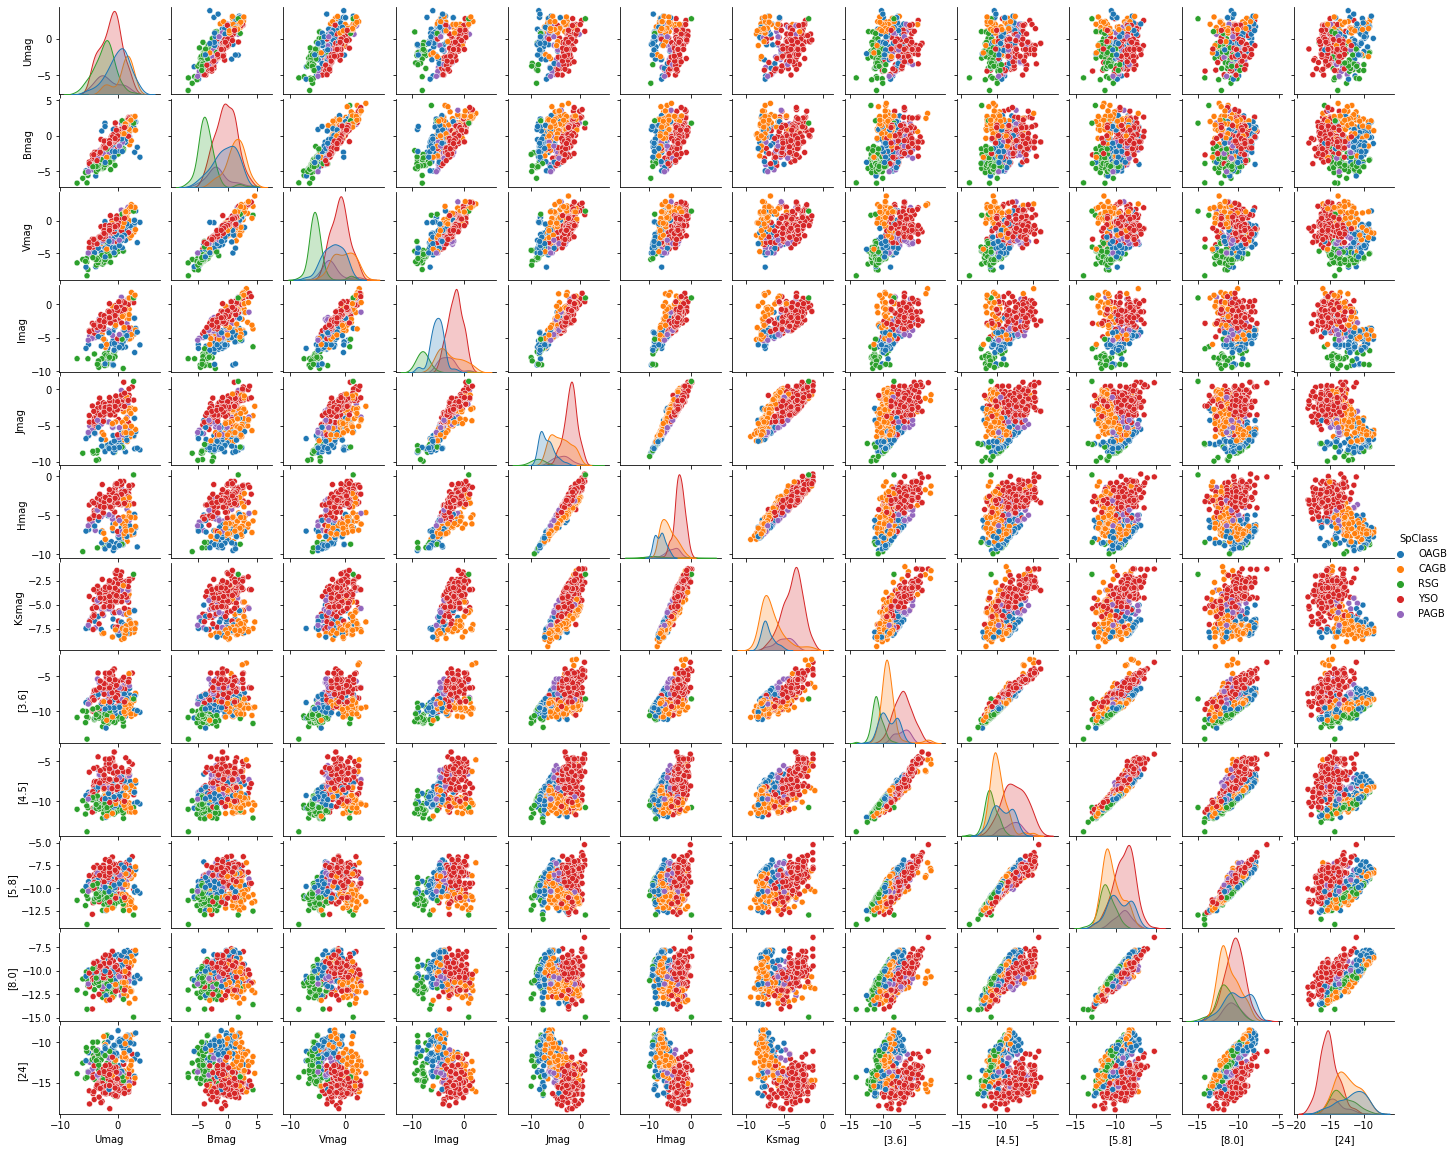

In [154]:
col = df.iloc[:,2:-1].columns
g = sns.pairplot(df.loc[:,col],hue="SpClass")
g.fig.set_size_inches(20,16)
plt.savefig('Pair_plot_dot.png',dpi=1000)

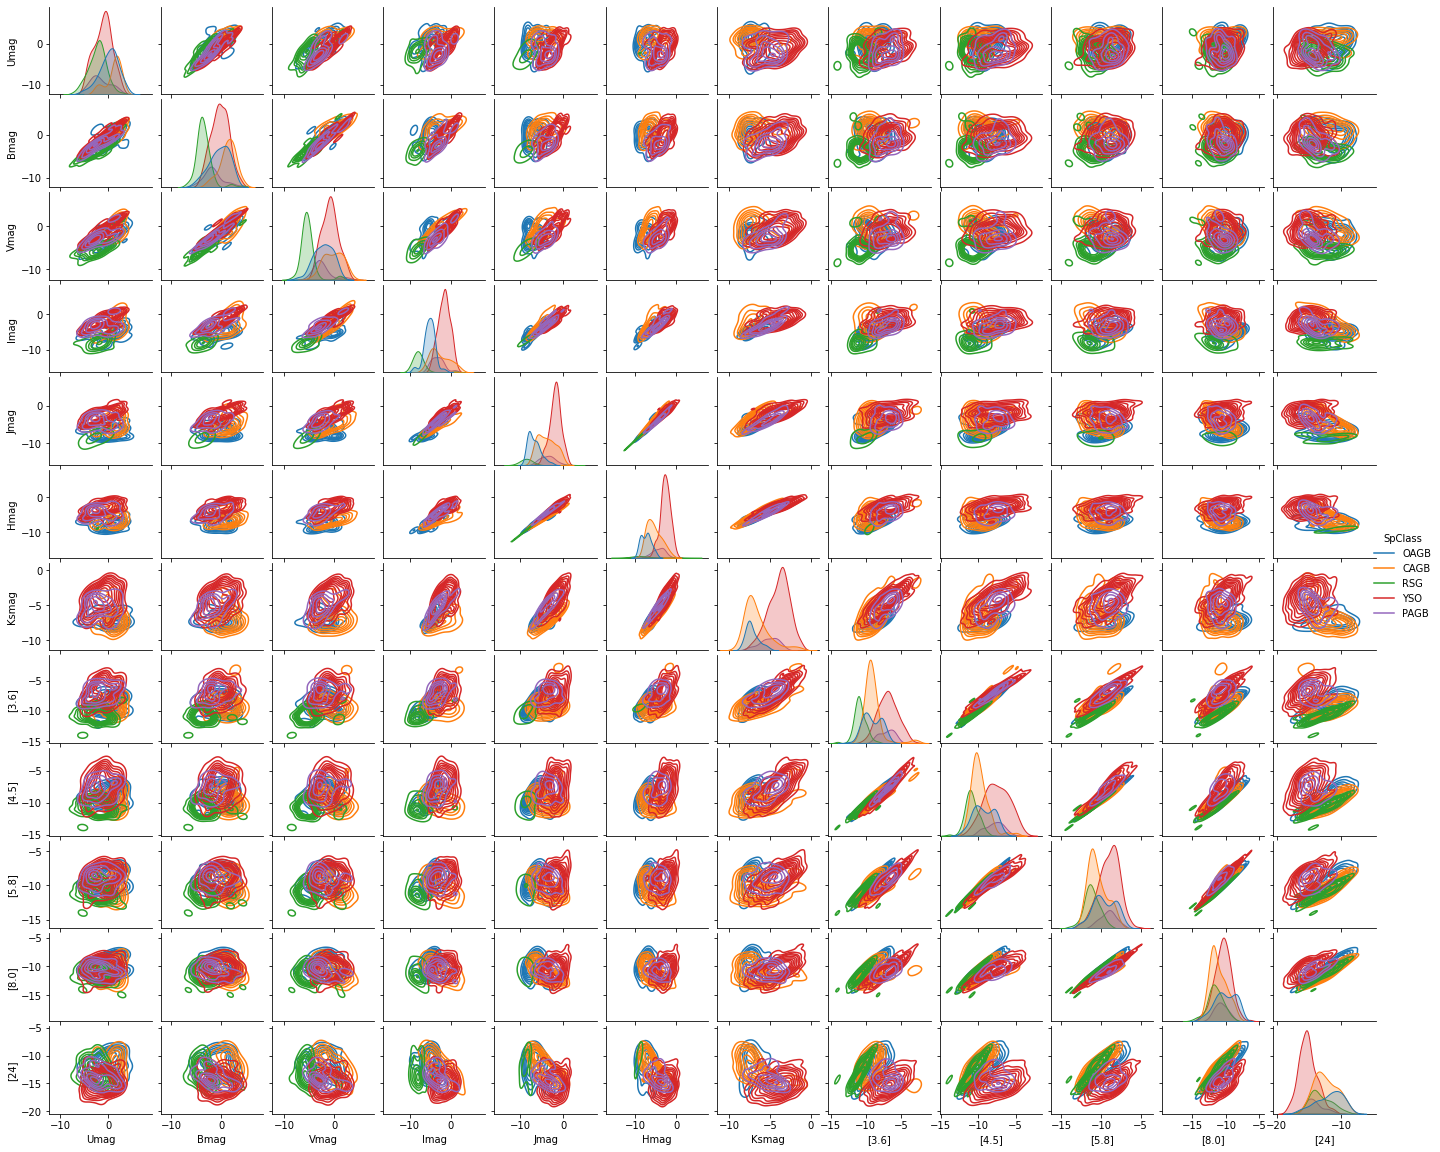

In [155]:
col = df.iloc[:,2:-1].columns
g = sns.pairplot(df.loc[:,col],hue="SpClass", kind='kde')
g.fig.set_size_inches(20,16)
plt.savefig('Pair_plot_line.png',dpi=1000)

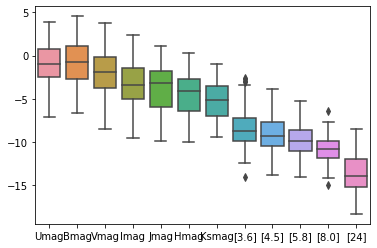

In [156]:
sns.boxplot(data=df.loc[:,col[0:-1]])
plt.show()

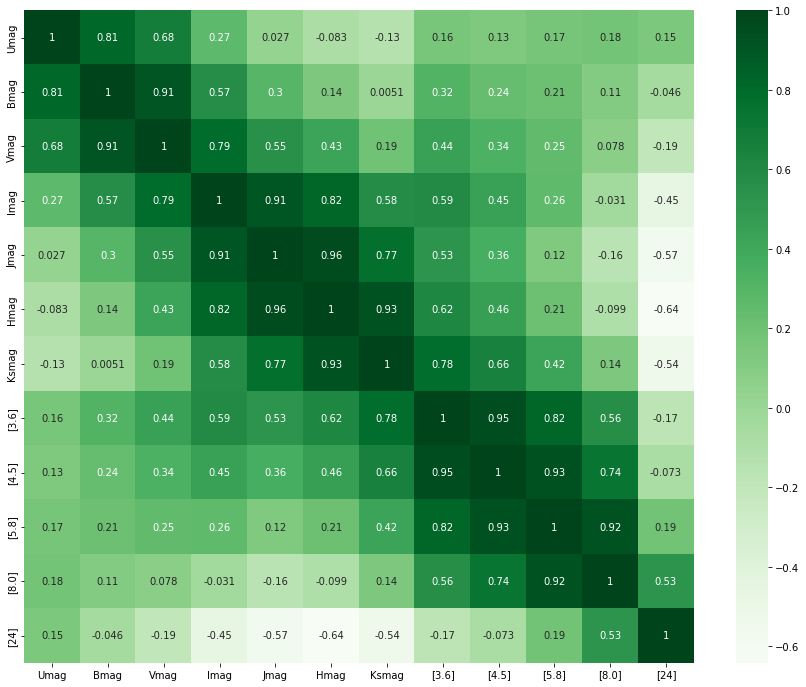

<Figure size 432x288 with 0 Axes>

In [157]:
plt.figure(figsize=(15,12)) #manage the size of the plot
sns.heatmap(df.loc[:,col].corr(),annot=True , cmap= "Greens" ) #df.corr() makes a correlation matrix and sns.heatmap is used to show the correlations heatmap
plt.show()
plt.savefig('Corelation.png',dpi=1000)

In [158]:
df

,RAdeg,DEdeg,Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],SpClass,GeneralClass
0,69.338100,-70.579000,NaN,-0.213,-2.052,-4.577,NaN,NaN,NaN,-7.6101,-7.7148,-7.8326,-8.0159,-8.8792,OAGB,DSS
1,71.613100,-68.796300,1.632,2.226,0.531,-2.137,-5.04,-6.57,-7.84,-8.6656,-9.3873,-9.8100,-10.2429,-11.1944,CAGB,DSS
2,71.827700,-69.705700,-0.727,-2.876,-4.804,-7.220,-8.42,NaN,NaN,-9.6540,-9.4759,-9.6545,-9.7627,-10.9685,RSG,DSS
3,72.157300,-69.393600,NaN,3.450,2.467,1.136,-1.32,-3.37,-5.31,-8.1534,-9.0379,-9.8431,-10.6543,-13.6554,YSO,DSS
4,72.393200,-69.097000,-5.087,-4.936,-5.254,-5.992,-6.39,-6.86,-7.42,-8.4329,-8.9152,-9.2952,-9.9431,-11.3106,OAGB,DSS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,15.093451,-72.166074,-0.232,0.796,0.248,-0.445,NaN,-2.54,-4.04,-6.3120,-7.3400,-8.2350,-9.4640,-13.6900,YSO,DSS
604,14.527078,-72.068717,-0.459,-0.388,-0.926,-1.672,-2.36,-2.83,-3.27,-5.5270,-5.6600,-8.0320,-9.6220,-15.6450,YSO,DSS
605,14.488457,-72.654396,-1.433,-0.683,-1.165,-1.937,-2.42,-3.14,-4.14,-6.6860,-7.2730,-8.2610,-9.2260,-15.2890,YSO,DSS
606,14.027887,-72.789808,-1.445,-1.084,-1.477,-2.014,-2.74,-3.09,-3.23,-5.4810,-5.9750,-7.7430,-9.1680,-15.3400,YSO,DSS


In [159]:
df.to_csv('Preprocessed_Data.csv', index=False)